In [1]:
import numpy as np
import matplotlib.pyplot as plt

Para encontrar una solución numérica a la integral:

$d_{p} =\frac{c}{H_{0}}\int_{0}^{a_{0}=1}{\frac{da'}{\sqrt{\Omega_{r,0}+\Omega_{m,0}a'+\Omega_{\Lambda,0}a'^{4}+(1-\Omega_{0})a'^{2}}}}$

usaremos valores para las densidades reportadas en https://arxiv.org/abs/1807.06209 (Planck,2018):

$\Omega_{m,0}=0.320$,$\Omega_{\Lambda,0}=0.680$,$\Omega_{r,0}=0$ $H_{0}=67.4 km/s Mpc$

Donde consideramos la materia oscura y la materia bariónica en $\Omega_{m,0}$ y además $\Omega_{0}=1$ para el universo plano que estamos considerando en este trabajo.

In [2]:
def simpson(a,b):
    y = 1/(np.sqrt(omega_0/a+(1-omega_0)))
    I = ((b-a)/6)*((1/(omega_gamma + (omega_m*a)+(omega_lambda*(a**4))))+4*(1/(omega_gamma + (omega_m*(a+b))+(omega_lambda*((a+b**4)))))+(1/(omega_gamma + (omega_m*b)+(omega_lambda*(b**4)))))
    return (c/H_0)*I

In [3]:
omega_m = 0.320
omega_lambda = 0.680
omega_gamma = 0
H_0 = 67.4
c = 300000
omega_0 = 1
a = np.linspace(0.1,1,100)
I = np.zeros(100)
for i in range(len(a)):
    I[i] = simpson(a[i],1)
#print(I)  

In [4]:
omega_m = 0
omega_lambda = 1
omega_gamma = 0
H_0 = 67.4
c = 300000
omega_0 = 1
a = np.linspace(0.1,1,100)
I2 = np.zeros(100)
for i in range(len(a)):
    I2[i] = simpson(a[i],1)
#print(I2) 

In [5]:
omega_m = 1
omega_lambda = 0
omega_gamma = 0
H_0 = 67.4
c = 300000
omega_0 = 1
a = np.linspace(0.1,1,100)
I3 = np.zeros(100)
for i in range(len(a)):
    I3[i] = simpson(a[i],1)
#print(I2) 

(0.0, 17.0)

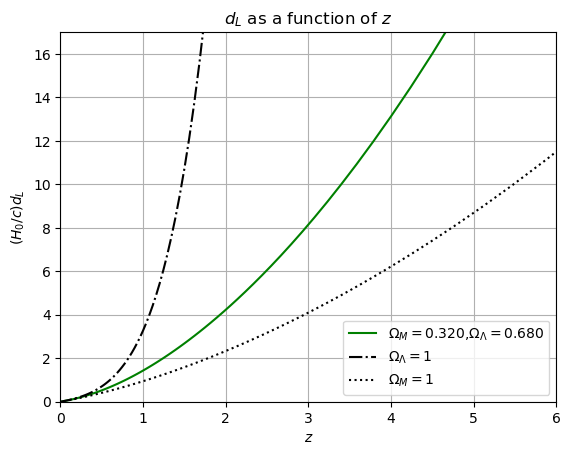

In [6]:
plt.plot(1/a-1, (H_0/c)*(I/a), color = 'green', linestyle = '-', label = '$\Omega_{M} = 0.320$,$\Omega_{\Lambda}=0.680$')
plt.plot(1/a-1,(H_0/c)*(I2/a), color = 'black', linestyle = '-.', label = '$\Omega_{\Lambda} = 1$')
plt.plot(1/a-1,(H_0/c)*(I3/a), color = 'black', linestyle = ':', label = '$\Omega_{M} = 1$')
#plt.plot(I, I/r, color = 'black', linestyle = ':', label = '$d_{L}$')
plt.grid()
plt.xlabel('$z$')
plt.ylabel('$(H_{0}/c)d_{L}$')
plt.legend()
plt.title('$d_{L}$ as a function of $z$')
plt.xlim(0,6)
plt.ylim(0,17)
#plt.savefig('d_l')

(0.0, 6.0)

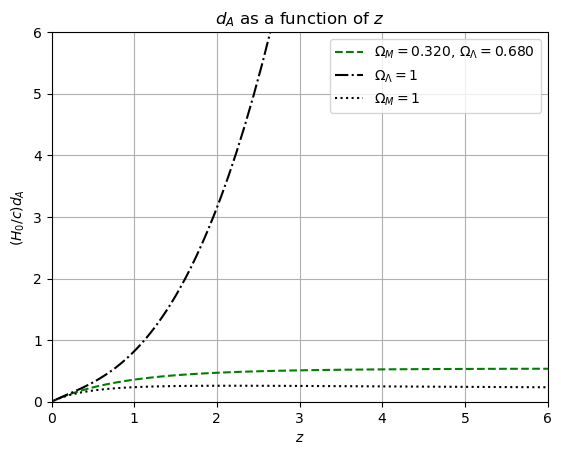

In [7]:
plt.plot(1/a-1,(H_0/c)*(I*a), color = 'green', linestyle = '--', label = '$\Omega_{M} = 0.320$, $\Omega_{\Lambda}=0.680$')
plt.plot(1/a-1,(H_0/c)*(I2*a), color = 'black', linestyle = '-.', label = '$\Omega_{\Lambda} = 1$')
plt.plot(1/a-1,(H_0/c)*(I3*a), color = 'black', linestyle = ':', label = '$\Omega_{M} = 1$')
#plt.plot(I, I/r, color = 'black', linestyle = ':', label = '$d_{L}$')
plt.grid()
plt.xlabel('$z$')
plt.ylabel('$(H_{0}/c)d_{A}$')
plt.legend()
plt.title('$d_{A}$ as a function of $z$')
plt.xlim(0,6)
plt.ylim(0,6)
#plt.savefig('d_a')

(0.0, 16000.0)

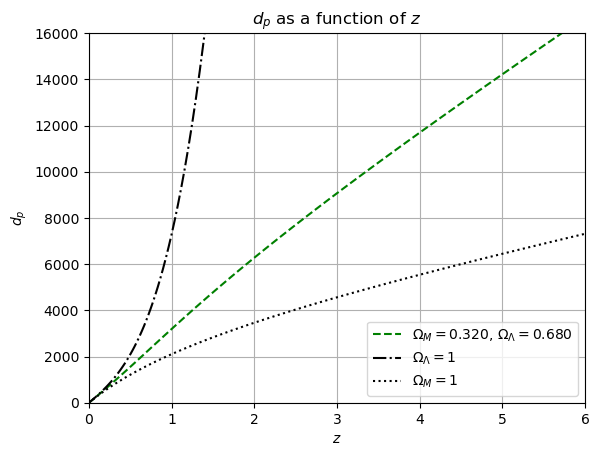

In [8]:
plt.plot(1/a-1,I, color = 'green', linestyle = '--', label = '$\Omega_{M} = 0.320$, $\Omega_{\Lambda}=0.680$')
plt.plot(1/a-1,I2, color = 'black', linestyle = '-.', label = '$\Omega_{\Lambda} = 1$')
plt.plot(1/a-1,I3, color = 'black', linestyle = ':', label = '$\Omega_{M} = 1$')
#plt.plot(I, I/r, color = 'black', linestyle = ':', label = '$d_{L}$')
plt.grid()
plt.xlabel('$z$')
plt.ylabel('$d_{p}$')
plt.legend()
plt.title('$d_{p}$ as a function of $z$')
plt.xlim(0,6)
plt.ylim(0,16000)
#plt.savefig('d_p')

Distance modulus:

$\mu = 5log_{10}\left(\frac{d_{L}}{1Mpc}\right)+25$

In [19]:
mu_teo = 5*np.log10(I/a) + 25

C:\Users\puma_\AppData\Local\Temp\ipykernel_8432\446726495.py:1: RuntimeWarning: divide by zero encountered in log10
  mu_teo = 5*np.log10(I/a) + 25


In [20]:
mu_teo.shape

(100,)

In [11]:
data = np.genfromtxt('https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt')

In [22]:
mu = data[:,2:3]
z = data[:,1:2]

In [23]:
mu.shape

(580, 1)

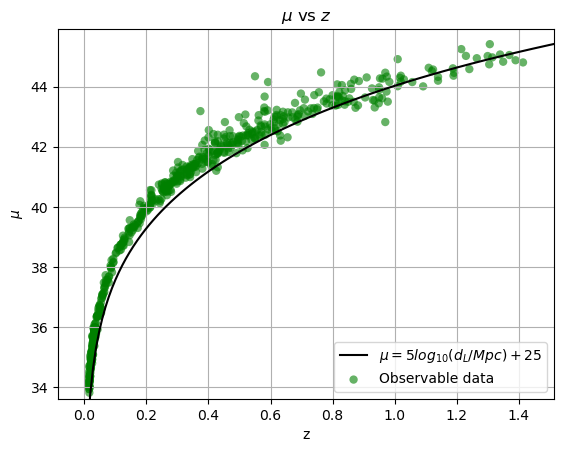

In [45]:
plt.plot(, mu_teo,color = 'black', label = '$\mu = 5log_{10}(d_{L}/Mpc)+25$')
plt.scatter(z,mu,alpha = 0.6, edgecolor = 'None',color = 'green', label = 'Observable data')
plt.grid()
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.legend()
plt.title('$\mu$ vs $z$')
plt.xlim(min(z)-0.1,max(z)+0.1)
plt.ylim(min(mu)-0.2,max(mu)+0.5)
plt.savefig('Distance_modulus')